In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
pd.options.mode.chained_assignment = None

In [81]:
path = r"CBS.csv"

data = pd.read_csv(path,sep=';',skiprows=[0, 1, 2, 3 ],header=[0, 1, 2],index_col=[0])
data = data.replace(',', '.', regex=True)

data = data.dropna(thresh=data.shape[1] - 1)
data = data.drop('Unnamed: 1_level_0',axis=1,level=0)
data.index = data.index.str.replace('*', '', regex=False)


In [82]:
# Define translations for column names
column_translations = {
    'Reismotieven': 'Travel motives',
    'aantal': 'Count',
    'km': 'Distance in km',
    'Minuten': 'Minutes',
    'snelheid': 'Speed in kmh'
}

# Define translations for travel motives
travel_motive_translations = {
    'Van en naar het werk': 'Commuting to and from work',
    'Vrije tijd': 'Free time',
    'Winkelen. boodschappen doen': 'Groceries and shopping',
    'Onderwijs volgen. cursus. kinderopvang': 'Education',
    'Totaal': 'Total',
    'Overige reismotieven': 'Other'
}

# Define the data subsets
total = data.iloc[:, [0, 1, 2, 3]]
driver = data.iloc[:, [0, 4, 5, 6]]
passenger = data.iloc[:, [0, 7, 8, 9]]
train = data.iloc[:, [0, 10, 11, 12]]
btm = data.iloc[:, [0, 13, 14, 15]]
bike = data.iloc[:, [0, 16, 17, 18]]
walking = data.iloc[:, [0, 19, 20, 21]]
others = data.iloc[:, [0, 22, 23, 24]]

# List of the datasets
datasets = [total, driver, passenger, train, btm, bike, walking, others]

# Iterate over each dataset
for df in datasets:
    # Drop the first two levels of the column index if applicable
    df.columns = df.columns.droplevel([0, 1])
    df.index.name = 'Year'
    
    # Rename columns to English
    df.rename(columns=column_translations, inplace=True)
    
    # Translate travel motives
    df['Travel motives'] = df['Travel motives'].replace(travel_motive_translations)
    
    # Convert columns to numeric, if necessary
    df['Count'] = pd.to_numeric(df['Count'], errors='coerce')
    df['Distance in km'] = pd.to_numeric(df['Distance in km'], errors='coerce')
    df['Minutes'] = pd.to_numeric(df['Minutes'], errors='coerce')
    
    # Calculate 'Speed in kmh' by dividing distance by time in hours and round to two decimals
    df['Speed in kmh'] = (df['Distance in km'] / (df['Minutes'] / 60)).round(2)

# Display the updated 'btm' dataset as a check
display(total)


Perioden,Travel motives,Count,Distance in km,Minutes,Speed in kmh
Year,,,,,
1999,Total,3.41,10.96,23.72,27.72
1999,Commuting to and from work,0.59,14.78,24.83,35.71
1999,Groceries and shopping,0.73,4.96,14.97,19.88
1999,Education,0.30,6.85,17.64,23.30
1999,Free time,1.19,12.42,31.37,23.76
...,...,...,...,...,...
2019,Commuting to and from work,0.61,16.13,24.83,38.98
2019,Groceries and shopping,0.57,5.36,14.35,22.41
2019,Education,0.28,7.28,18.58,23.51


In [83]:
import plotly.express as px

# Define a color dictionary for each travel motive
color_map = {
    'Commuting to and from work': '#1f77b4',
    'Free time': '#ff7f0e',
    'Groceries and shopping': '#2ca02c',
    'Education': '#d62728',
    'Total': '#9467bd',
    'Other': '#8c564b'
}

# Calculate the average speed by travel motive, sort in descending order, and move "Total" to the top
average_speed = total.groupby('Travel motives')['Speed in kmh'].mean().sort_values(ascending=False).round(2)

# Ensure "Total" appears first in the sorted Series
average_speed = average_speed.reindex(['Total'] + [motive for motive in average_speed.index if motive != 'Total'])

# Create the horizontal bar plot with colors assigned by the color map
fig = px.bar(
    average_speed,
    x=average_speed.values,
    y=average_speed.index,
    orientation='h',
    title='Average speed by travel motives over last 20 years',
    labels={'x': 'Average speed (km/h)', 'y': 'Travel motives'},
    color=average_speed.index,  # Set color by travel motives
    color_discrete_map=color_map  # Apply custom color map
)

# Update layout to remove the legend and ensure "Total" is at the top
fig.update_layout(
    xaxis_title="Average speed (km/h)",
    yaxis_title="",
    showlegend=False  # Remove legend
)

# Show the plot
fig.show()


In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'totaal' DataFrame is already defined and looks similar to the one described earlier

# # Display the DataFrame
# display(totaal)

# # Resetting the index to treat 'Perioden' as a regular column
totaal.reset_index(inplace=True)

# # Display the DataFrame's columns and the first few rows
# print(totaal.columns)
# display(totaal.head())

# Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean speed
grouped_speed = totaal.groupby(['index', 'Reismotieven'])['snelheid'].mean().reset_index()

# Print the grouped data to verify
print(grouped_speed)

# Create the line plot for speed changes over time for each motive
plt.figure(figsize=(14, 7))

# Loop through each unique travel motive to plot
for motive in grouped_speed['Reismotieven'].unique():
    motive_data = grouped_speed[grouped_speed['Reismotieven'] == motive]
    plt.plot(motive_data['index'], motive_data['snelheid'], marker='o', label=motive)

# Add titles and labels
plt.title('Change of Speed Over Time by Travel Motivation')
plt.xlabel('Year')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=45)
# plt.xticks(range(min(grouped_speed['index']), max(grouped_speed['index']) + 1))  # Ensuring all years are shown

# Add a legend
plt.legend(title='Travel Motivation', loc='upper left')  # You can adjust the location as needed

# Add a grid for better readability
plt.grid()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


ValueError: cannot insert level_0, already exists

Perioden,index,Reismotieven,aantal,km,Minuten,snelheid
0,1999,Totaal,3.41,10.96,23.72,27.72344
1,1999,Van en naar het werk,0.59,14.78,24.83,35.714861
2,1999,Winkelen. boodschappen doen,0.73,4.96,14.97,19.87976
3,1999,Onderwijs volgen. cursus. kinderopvang,0.3,6.85,17.64,23.29932
4,1999,Vrije tijd,1.19,12.42,31.37,23.75518
...,...,...,...,...,...,...
121,2019,Van en naar het werk,0.61,16.13,24.83,38.977044
122,2019,Winkelen. boodschappen doen,0.57,5.36,14.35,22.41115
123,2019,Onderwijs volgen. cursus. kinderopvang,0.28,7.28,18.58,23.50915
124,2019,Vrije tijd,1.05,13.5,32.59,24.85425


Index(['level_0', 'index', 'Reismotieven', 'aantal', 'km', 'Minuten',
       'snelheid'],
      dtype='object', name='Perioden')


Perioden,level_0,index,Reismotieven,aantal,km,Minuten,snelheid
0,0,1999,Totaal,3.41,10.96,23.72,27.72344
1,1,1999,Van en naar het werk,0.59,14.78,24.83,35.714861
2,2,1999,Winkelen. boodschappen doen,0.73,4.96,14.97,19.87976
3,3,1999,Onderwijs volgen. cursus. kinderopvang,0.3,6.85,17.64,23.29932
4,4,1999,Vrije tijd,1.19,12.42,31.37,23.75518


    index                            Reismotieven     km
0    1999  Onderwijs volgen. cursus. kinderopvang   6.85
1    1999                    Overige reismotieven  13.76
2    1999                                  Totaal  10.96
3    1999                    Van en naar het werk  14.78
4    1999                              Vrije tijd  12.42
..    ...                                     ...    ...
121  2019                    Overige reismotieven  11.87
122  2019                                  Totaal  11.64
123  2019                    Van en naar het werk  16.13
124  2019                              Vrije tijd   13.5
125  2019             Winkelen. boodschappen doen   5.36

[126 rows x 3 columns]


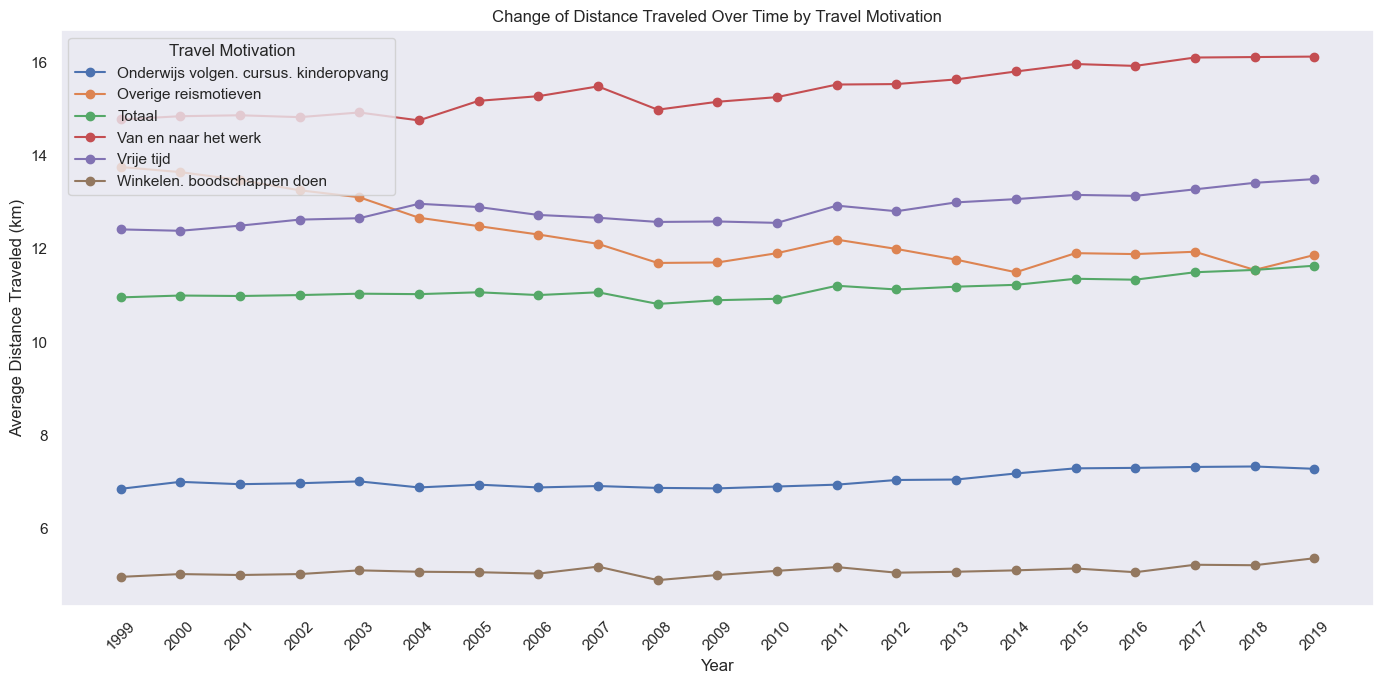

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Display the DataFrame to verify
display(totaal)

# Resetting the index to treat 'Perioden' as a regular column
totaal.reset_index(inplace=True)

# Display the DataFrame's columns and the first few rows
print(totaal.columns)
display(totaal.head())

# Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean distance
grouped_distance = totaal.groupby(['index', 'Reismotieven'])['km'].mean().reset_index()

# Print the grouped data to verify
print(grouped_distance)

# Create the line plot for distance changes over time for each motive
plt.figure(figsize=(14, 7))

# Loop through each unique travel motive to plot the distance traveled
for motive in grouped_distance['Reismotieven'].unique():
    motive_data = grouped_distance[grouped_distance['Reismotieven'] == motive]
    plt.plot(motive_data['index'], motive_data['km'], marker='o', label=motive)

# Add titles and labels
plt.title('Change of Distance Traveled Over Time by Travel Motivation')
plt.xlabel('Year')
plt.ylabel('Average Distance Traveled (km)')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Travel Motivation', loc='upper left')  # Adjust the location as needed

# Add a grid for better readability
plt.grid()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


    index                            Reismotieven Minuten
0    1999  Onderwijs volgen. cursus. kinderopvang   17.64
1    1999                    Overige reismotieven   21.22
2    1999                                  Totaal   23.72
3    1999                    Van en naar het werk   24.83
4    1999                              Vrije tijd   31.37
..    ...                                     ...     ...
121  2019                    Overige reismotieven   19.57
122  2019                                  Totaal   24.18
123  2019                    Van en naar het werk   24.83
124  2019                              Vrije tijd   32.59
125  2019             Winkelen. boodschappen doen   14.35

[126 rows x 3 columns]


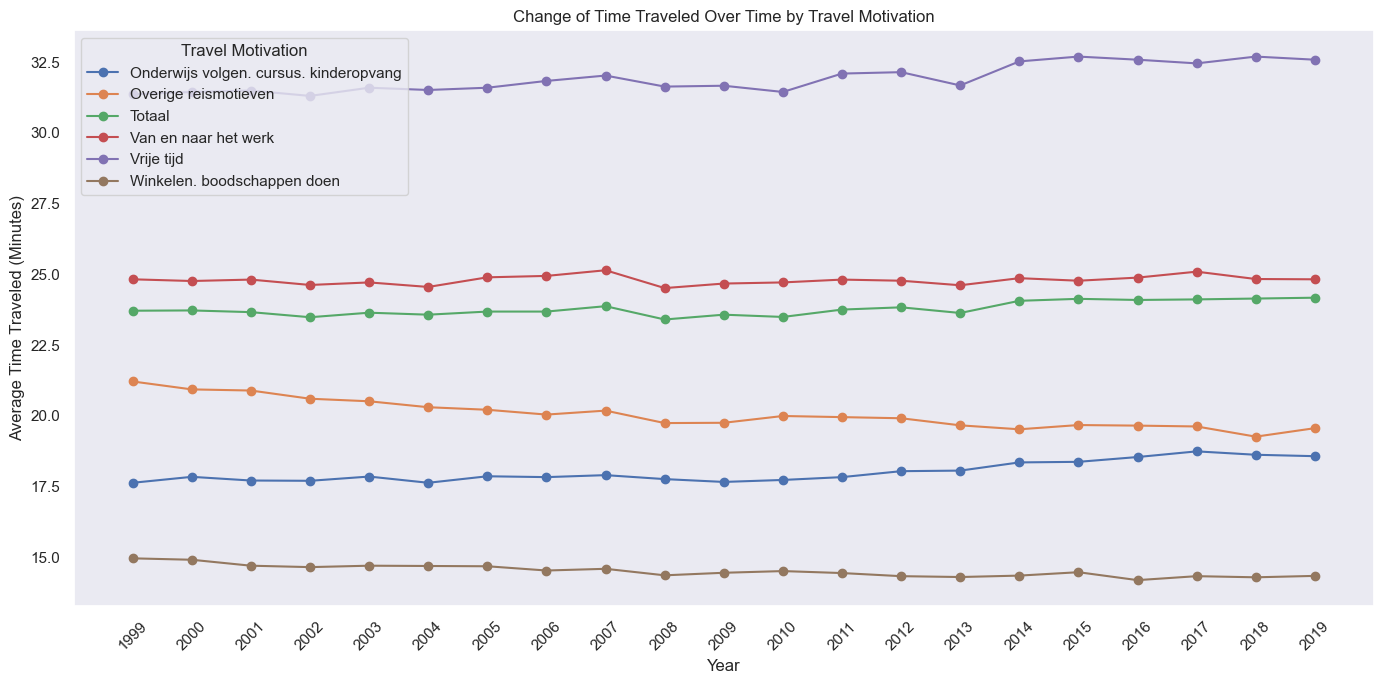

In [15]:
# Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean time traveled
grouped_time = totaal.groupby(['index', 'Reismotieven'])['Minuten'].mean().reset_index()

# Print the grouped data to verify
print(grouped_time)

# Create the line plot for time traveled changes over time for each motive
plt.figure(figsize=(14, 7))

# Loop through each unique travel motive to plot the time traveled
for motive in grouped_time['Reismotieven'].unique():
    motive_data = grouped_time[grouped_time['Reismotieven'] == motive]
    plt.plot(motive_data['index'], motive_data['Minuten'], marker='o', label=motive)

# Add titles and labels
plt.title('Change of Time Traveled Over Time by Travel Motivation')
plt.xlabel('Year')
plt.ylabel('Average Time Traveled (Minutes)')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Travel Motivation', loc='upper left')  # Adjust the location as needed

# Add a grid for better readability
plt.grid()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()


    index                            Reismotieven   snelheid
0    1999  Onderwijs volgen. cursus. kinderopvang  50.490654
1    1999                    Overige reismotieven  45.851756
2    1999                                  Totaal   40.55207
3    1999                    Van en naar het werk  43.018081
4    1999                              Vrije tijd  39.032258
..    ...                                     ...        ...
121  2019                    Overige reismotieven  44.320652
122  2019                                  Totaal     44.616
123  2019                    Van en naar het werk  49.354839
124  2019                              Vrije tijd  44.933831
125  2019             Winkelen. boodschappen doen   31.41319

[126 rows x 3 columns]


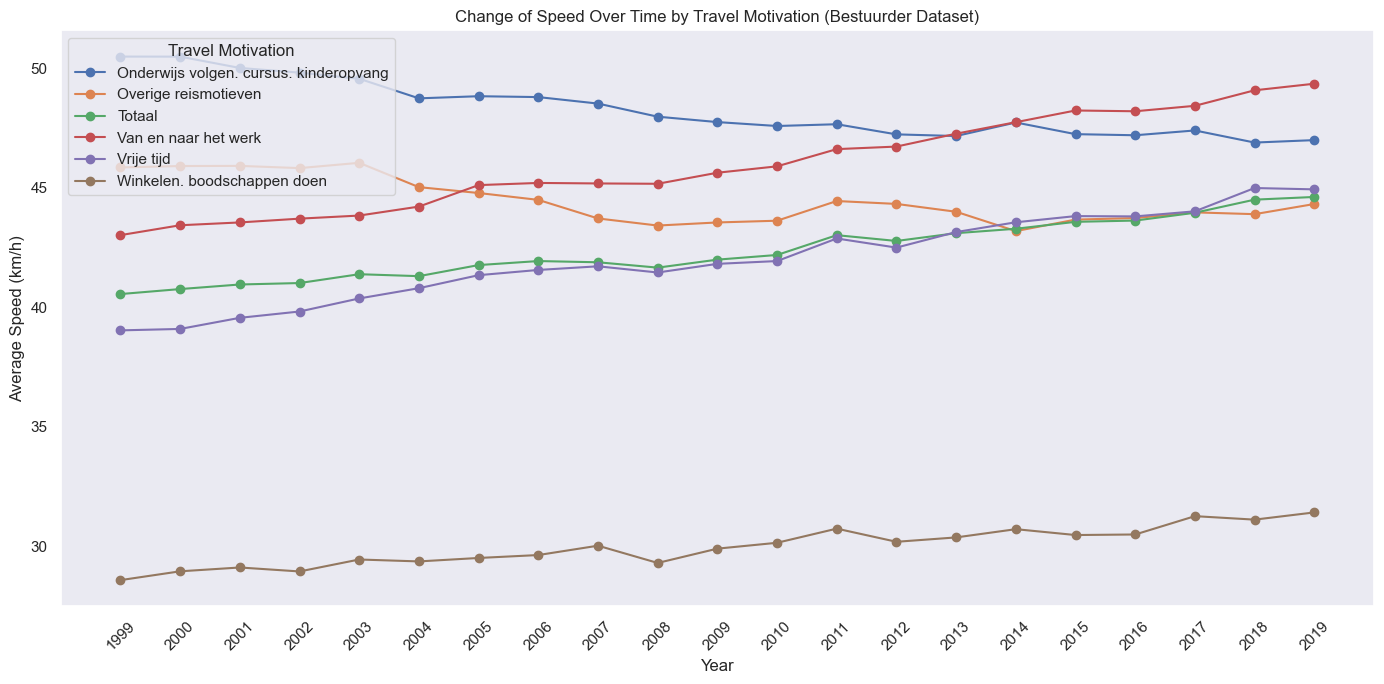

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Bestuurder' DataFrame is already defined and looks similar to the one described earlier

# Resetting the index to treat 'Perioden' as a regular column
Bestuurder.reset_index(inplace=True)

# Grouping by 'index' (which is now 'Perioden') and 'Reismotieven', then calculating the mean speed
grouped_speed = Bestuurder.groupby(['index', 'Reismotieven'])['snelheid'].mean().reset_index()

# Print the grouped data to verify
print(grouped_speed)

# Create the line plot for speed changes over time for each motive
plt.figure(figsize=(14, 7))

# Loop through each unique travel motive to plot
for motive in grouped_speed['Reismotieven'].unique():
    motive_data = grouped_speed[grouped_speed['Reismotieven'] == motive]
    plt.plot(motive_data['index'], motive_data['snelheid'], marker='o', label=motive)

# Add titles and labels
plt.title('Change of Speed Over Time by Travel Motivation (Bestuurder Dataset)')
plt.xlabel('Year')
plt.ylabel('Average Speed (km/h)')
plt.xticks(rotation=45)

# Add a legend
plt.legend(title='Travel Motivation', loc='upper left')  # You can adjust the location as needed

# Add a grid for better readability
plt.grid()

# Adjust layout to fit everything nicely
plt.tight_layout()

# Show the plot
plt.show()
